In [1]:
!pip install librosa soundfile numpy matplotlib ddsp tensorflow


  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import librosa
import librosa.display
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt


In [4]:
from google.colab import files

uploaded = files.upload()
voice_file = list(uploaded.keys())[0]


Saving project voice.mp3 to project voice (1).mp3


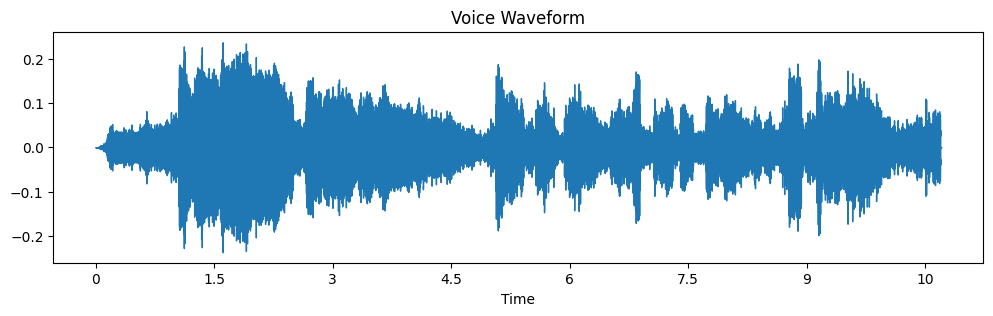

In [5]:
y, sr = librosa.load(voice_file)

plt.figure(figsize=(12,3))
librosa.display.waveshow(y, sr=sr)
plt.title("Voice Waveform")
plt.show()


In [6]:
f0, voiced_flag, voiced_probs = librosa.pyin(
    y,
    fmin=librosa.note_to_hz('C2'),
    fmax=librosa.note_to_hz('C7')
)

f0 = np.nan_to_num(f0)


In [7]:
instrument_freq = f0 * 0.8  # slight music effect


In [8]:
music = np.sin(2 * np.pi * instrument_freq * np.arange(len(instrument_freq)) / sr)
music = music / np.max(np.abs(music))


In [9]:
sf.write("generated_music.wav", music, sr)


In [10]:
from IPython.display import Audio
Audio("generated_music.wav")


In [11]:
!pip install librosa matplotlib numpy soundfile


In [12]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


In [13]:
from google.colab import files

uploaded = files.upload()
music_file = list(uploaded.keys())[0]

y, sr = librosa.load(music_file)


Saving three-bike-ride-bgm-48502.mp3 to three-bike-ride-bgm-48502.mp3


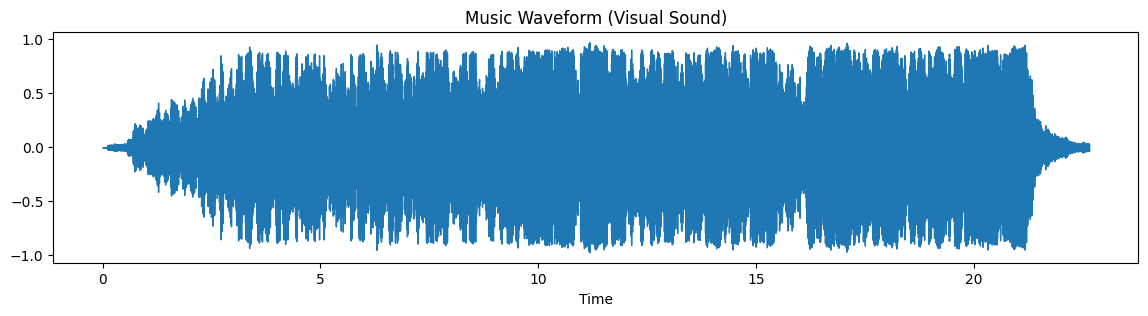

In [14]:
plt.figure(figsize=(14,3))
librosa.display.waveshow(y, sr=sr)
plt.title("Music Waveform (Visual Sound)")
plt.show()


In [15]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

print("Estimated Tempo (BPM):", tempo)


Estimated Tempo (BPM): [143.5546875]


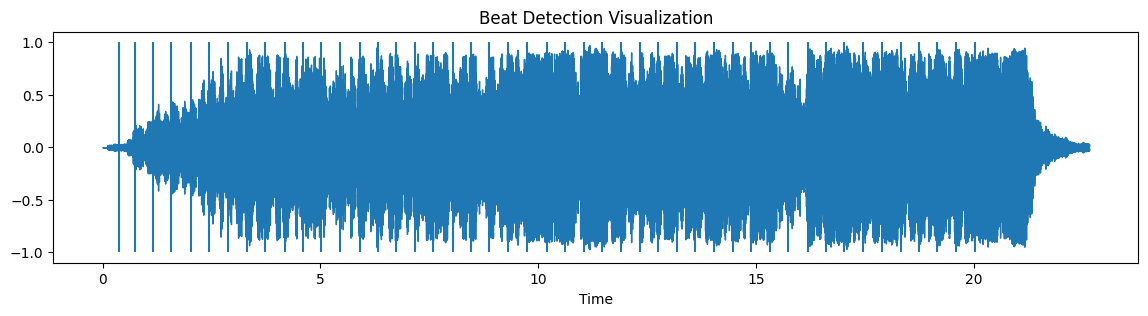

In [16]:
plt.figure(figsize=(14,3))
librosa.display.waveshow(y, sr=sr)

beat_times = librosa.frames_to_time(beats, sr=sr)
plt.vlines(beat_times, -1, 1)

plt.title("Beat Detection Visualization")
plt.show()


In [17]:
energy = np.mean(librosa.feature.rms(y=y))

if tempo > 120 and energy > 0.05:
    emotion = "Energetic 🔥"
elif tempo < 80:
    emotion = "Sad 😢"
else:
    emotion = "Calm 😊"

print("Detected Music Emotion:", emotion)


Detected Music Emotion: Energetic 🔥


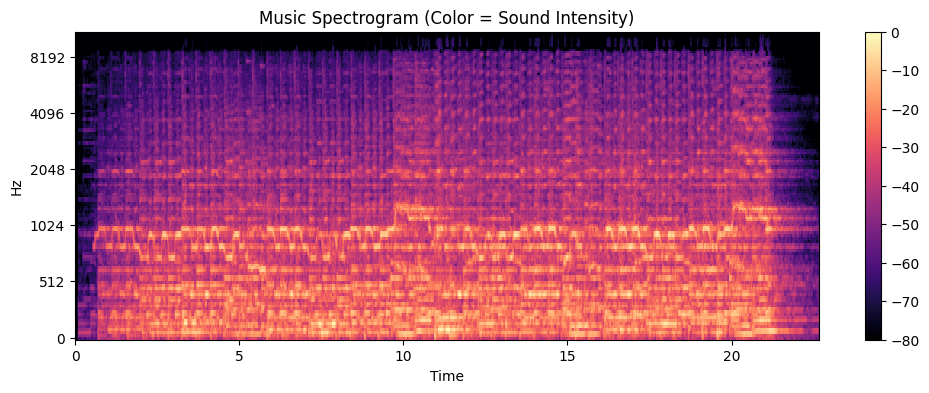

In [18]:
spec = librosa.feature.melspectrogram(y=y, sr=sr)
spec_db = librosa.power_to_db(spec, ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title("Music Spectrogram (Color = Sound Intensity)")
plt.show()


In [22]:
!pip install librosa numpy matplotlib


In [23]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


In [26]:
from google.colab import files

uploaded = files.upload()
audio_file = list(uploaded.keys())[0]

y, sr = librosa.load(audio_file)


Saving three-bike-ride-bgm-48502.mp3 to three-bike-ride-bgm-48502 (1).mp3


In [27]:
rms = librosa.feature.rms(y=y)[0]
times = librosa.frames_to_time(range(len(rms)), sr=sr)

threshold = np.mean(rms) + 2 * np.std(rms)
alert_times = times[rms > threshold]

print("Loud Sound Detected at (seconds):")
print(alert_times[:10])


Loud Sound Detected at (seconds):
[11.12235828 11.14557823 11.30811791 11.33133787 11.35455782 11.37777778
 11.40099773]


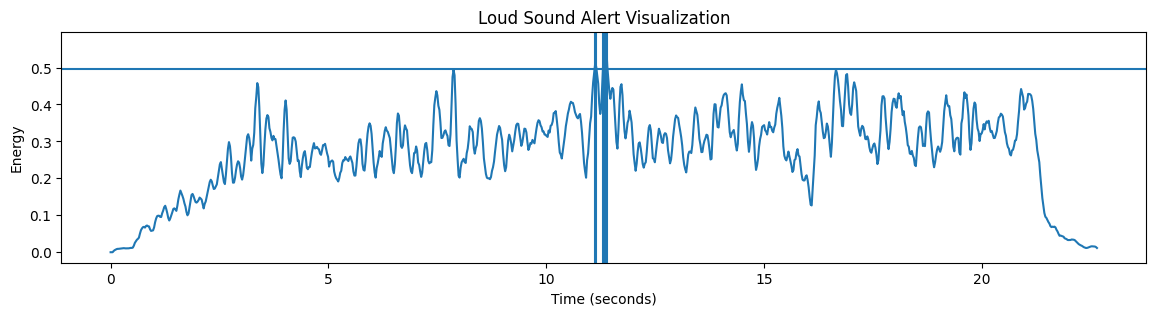

In [28]:
plt.figure(figsize=(14,3))
plt.plot(times, rms)
plt.axhline(threshold)

for t in alert_times[:10]:
    plt.axvline(t)

plt.title("Loud Sound Alert Visualization")
plt.xlabel("Time (seconds)")
plt.ylabel("Energy")
plt.show()


In [29]:
def classify_sound(y, sr):
    spec_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))

    if spec_centroid < 1500 and zcr < 0.1:
        return "Door Knock 🚪"
    elif spec_centroid > 3000:
        return "Horn 🚗"
    else:
        return "Explosion 💥"

sound_type = classify_sound(y, sr)
print("Detected Sound Type:", sound_type)


Detected Sound Type: Door Knock 🚪


In [30]:
print("⚠️ ALERT!")
print("Sound Type:", sound_type)
print("Alert Time (first):", alert_times[0] if len(alert_times) > 0 else "None")


⚠️ ALERT!
Sound Type: Door Knock 🚪
Alert Time (first): 11.122358276643991


In [39]:
!pip install moviepy


In [40]:
import moviepy
print("MoviePy Version:", moviepy.__version__)


MoviePy Version: 2.1.2


In [41]:
!pip install -q moviepy openai-whisper transformers torch


In [44]:
from moviepy.video.io.VideoFileClip import VideoFileClip
import whisper
from transformers import pipeline
from google.colab import files


In [45]:
# Upload video
uploaded = files.upload()
video_file = list(uploaded.keys())[0]


Saving Seaborn functions explanation - Google Chrome 2025-12-14 13-52-54.mp4 to Seaborn functions explanation - Google Chrome 2025-12-14 13-52-54.mp4


In [46]:

# Extract audio
clip = VideoFileClip(video_file)
clip.audio.write_audiofile("movie_audio.wav")

MoviePy - Writing audio in movie_audio.wav


MoviePy - Done.


In [47]:
# Transcribe
model = whisper.load_model("base")
result = model.transcribe("movie_audio.wav")

100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 177MiB/s]
/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [48]:

# Emotion detection
emo = pipeline("text-classification",
               model="j-hartmann/emotion-english-distilroberta-base")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


In [49]:
# Display first 5 segments
for seg in result['segments'][:5]:
    emotion_label = emo(seg['text'])[0]['label']
    print(f"[{seg['start']:.2f}s] Emotion: {emotion_label} | Text: {seg['text']}")

[0.00s] Emotion: neutral | Text:  you
[30.00s] Emotion: neutral | Text:  you
[60.00s] Emotion: neutral | Text:  you
[90.00s] Emotion: neutral | Text:  you
[120.00s] Emotion: neutral | Text:  you
